This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [41]:
# Solve Here
import pandas as pd

data = pd.read_csv('iris_not_clean.data', sep = '|', header = None , comment= "#") 
data.columns =['sepal_length', 'sepal_width', 'petal_length', 'petal width','class']
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
sepal_length    151 non-null float64
sepal_width     152 non-null float64
petal_length    151 non-null float64
petal width     151 non-null float64
class           151 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


(None,        sepal_length  sepal_width  petal_length  petal width
 count    151.000000   152.000000    151.000000   151.000000
 mean       5.833775     3.057237      3.747020     1.192053
 std        0.833618     0.431784      1.764608     0.764942
 min        4.300000     2.000000      1.000000     0.100000
 25%        5.100000     2.800000      1.600000     0.300000
 50%        5.800000     3.000000      4.300000     1.300000
 75%        6.400000     3.300000      5.100000     1.800000
 max        7.900000     4.400000      6.900000     2.500000)

In [42]:
data.head(5)


,sepal_length,sepal_width,petal_length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
data['sepal_length'] = pd.to_numeric(data['sepal_length'],errors='coerce')#turn sepal length data type to float
data.info(),data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
sepal_length    151 non-null float64
sepal_width     152 non-null float64
petal_length    151 non-null float64
petal width     151 non-null float64
class           151 non-null object
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


(None,    sepal_length  sepal_width  petal_length  petal width        class
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa)

In [44]:
data.describe()

,sepal_length,sepal_width,petal_length,petal width
count,151.000000,152.000000,151.000000,151.000000
mean,5.833775,3.057237,3.747020,1.192053
std,0.833618,0.431784,1.764608,0.764942
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
#Which rows contains nans and how many nans in each of these rows
rows_with_nulls = data[pd.isnull(data).any(axis=1)]
rows_with_nulls

,sepal_length,sepal_width,petal_length,petal width,class
28,5.2,3.4,NaN,0.2,Iris-setosa
29,NaN,NaN,NaN,NaN,NaN
44,NaN,3.2,2.1,NaN,NaN


In [46]:
rows_with_nulls.isnull().sum(axis=1)#how many nulls in each of these rows

28    1
29    5
44    3
dtype: int64

In [47]:
#counting number of nulls, the above code also does provide a solution but lets do this too
nan_df = data.isna() #you can head the dataset to see what it looks like

nan_df.apply(pd.Series.value_counts)

,sepal_length,sepal_width,petal_length,petal width,class
False,151,152,151,151,151
True,2,1,2,2,2


In [48]:
data.shape

(153, 5)

In [49]:
df =data.dropna()#dopping nulls, 5 rows were dropped 
df.shape

(150, 5)

In [50]:
df.describe(), df.info() ,df.head()#no more nulls 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 152
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


(       sepal_length  sepal_width  petal_length  petal width
 count    150.000000   150.000000    150.000000   150.000000
 mean       5.838000     3.054000      3.758000     1.198667
 std        0.834786     0.433594      1.765336     0.763161
 min        4.300000     2.000000      1.000000     0.100000
 25%        5.100000     2.800000      1.600000     0.300000
 50%        5.800000     3.000000      4.350000     1.300000
 75%        6.400000     3.300000      5.100000     1.800000
 max        7.900000     4.400000      6.900000     2.500000,
 None,
    sepal_length  sepal_width  petal_length  petal width        class
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa)

In [51]:

#The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. 
#Is that what you have? If not, fix it
df.iloc[36]

sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal width             0.1
class           Iris-setosa
Name: 38, dtype: object

In [52]:
df.iloc[36,3] = 0.2
df.iloc[36]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal width             0.2
class           Iris-setosa
Name: 38, dtype: object

In [53]:
df.iloc[39], df.loc[39], df.head()

(sepal_length              5
 sepal_width             3.5
 petal_length            1.3
 petal width             0.3
 class           Iris-setosa
 Name: 41, dtype: object, sepal_length            4.4
 sepal_width               3
 petal_length            1.3
 petal width             0.2
 class           Iris-setosa
 Name: 39, dtype: object,    sepal_length  sepal_width  petal_length  petal width        class
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa)

In [54]:
#The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa", where the errors are in the second and third features. Fix it
df.iloc[39]=[4.9,3.6,1.4,0.1,"Iris-setosa"]
df.iloc[39]

sepal_length            4.9
sepal_width             3.6
petal_length            1.4
petal width             0.1
class           Iris-setosa
Name: 41, dtype: object

In [55]:
print(data)#why are you printiing data

     sepal_length  sepal_width  petal_length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

In [56]:
data #why??

,sepal_length,sepal_width,petal_length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per feature, i.e. grouped by features

In [57]:
# Solve Here
# Mean and variance
data.mean()

sepal_length    5.833775
sepal_width     3.057237
petal_length    3.747020
petal width     1.192053
dtype: float64

In [58]:
data.var() #variance for each column

sepal_length    0.694918
sepal_width     0.186437
petal_length    3.113841
petal width     0.585136
dtype: float64

In [59]:
# Drop the nan rows
data.dropna(inplace = True)


In [60]:
# Recaluclate the mean and variance for each column
data.mean(), data.var()

(sepal_length    5.838000
 sepal_width     3.054000
 petal_length    3.758000
 petal width     1.198667
 dtype: float64, sepal_length    0.696868
 sepal_width     0.188004
 petal_length    3.116412
 petal width     0.582414
 dtype: float64)

In [61]:
# What is the correlation between the fourth column and each of the other three 
# columns individually? Any observations
data.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal width
sepal_length,1.000000,-0.113621,0.873536,0.819785
sepal_width,-0.113621,1.000000,-0.420601,-0.356544
petal_length,0.873536,-0.420601,1.000000,0.962755
petal width,0.819785,-0.356544,0.962755,1.000000


In [62]:
# How many records exist for each class. # Hint, you can do this in one line by using groupby
data.columns, data.groupby('class').size()

(Index(['sepal_length', 'sepal_width', 'petal_length', 'petal width', 'class'], dtype='object'),
 class
 Iris-setosa        50
 Iris-versicolor    50
 Iris-virginica     50
 dtype: int64)

In [63]:
# Change the random seed to 1234 and randomly pick 20 samples of the data and display it
import numpy as np
import random as randn

np.random.seed(1234)
df.sample(n=20)



,sepal_length,sepal_width,petal_length,petal width,class
94,6.1,3.0,4.6,1.4,Iris-versicolor
66,6.1,2.9,4.7,1.4,Iris-versicolor
106,6.3,2.9,5.6,1.8,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
62,5.2,2.7,3.9,1.4,Iris-versicolor
31,4.8,3.1,1.6,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
37,5.5,3.5,1.3,0.2,Iris-setosa
102,5.7,2.8,4.1,1.3,Iris-versicolor
125,7.7,2.8,6.7,2.0,Iris-virginica


In [64]:
# Plot histogram for all the data attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2E0473E10>,
      dtype=object)

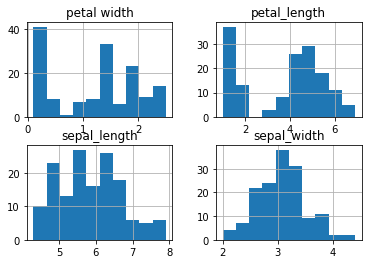

In [65]:
%matplotlib inline
data.hist()

class
Iris-setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

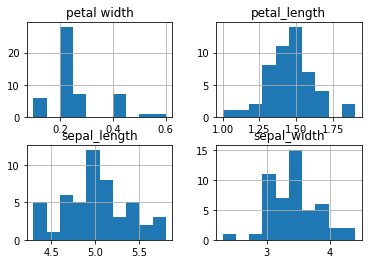

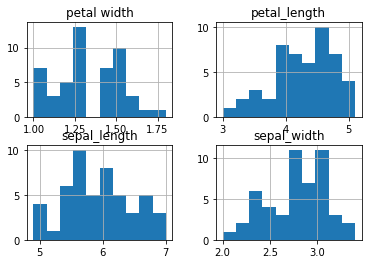

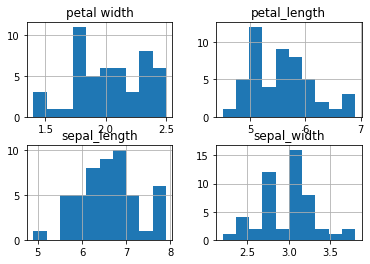

In [66]:
data.groupby('class').hist()

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

In [67]:
data2

0      1.4
1      NaN
2      1.4
3      1.3
4      1.5
5      1.4
6      1.7
7      1.4
8      1.5
9      1.4
10     1.5
11     1.5
12     1.6
13     1.4
14     1.1
15     1.2
16     1.5
17     1.3
18     1.4
19     1.7
20     1.5
21     1.7
22     1.5
23     1.0
24     1.7
25     1.9
26     1.6
27     1.6
28     1.5
29     NaN
      ... 
125    5.7
126    4.9
127    6.7
128    4.9
129    5.7
130    6.0
131    4.8
132    4.9
133    5.6
134    5.8
135    6.1
136    6.4
137    5.6
138    5.1
139    5.6
140    6.1
141    5.6
142    5.5
143    4.8
144    5.4
145    5.6
146    5.1
147    5.1
148    5.9
149    5.7
150    5.2
151    5.0
152    5.2
153    5.4
154    5.1
Name: petal_length, Length: 155, dtype: float64

In [70]:
# Solve Here

import scipy.stats
import matplotlib.pyplot as plt

data2 = data['petal_length']

xxx = np.linspace(data2.min()-1,data2.max()+1,250)
yyy = scipy.stats.gaussian_kde(data2)

In [73]:
# 500 samples
samples = yyy.resample(500)
samples                    


array([[0.83390041, 3.72107278, 5.42919451, 1.64689413, 1.07657404,
        5.94235766, 4.40724075, 5.1682748 , 1.58871593, 1.76714273,
        3.32635315, 4.18488615, 5.5138434 , 4.88360556, 1.19380394,
        5.39670068, 7.49358664, 0.2697765 , 5.66735278, 0.19136922,
        5.50788122, 6.08549636, 4.7678411 , 4.18194104, 1.74109981,
        2.5215199 , 1.33050482, 6.35587919, 1.43900336, 4.09969459,
        4.55745634, 1.88271718, 2.89636086, 1.65514455, 5.7893736 ,
        4.10622219, 5.24981433, 1.73978664, 6.1552445 , 1.29800257,
        2.02889207, 2.52710691, 4.41451465, 3.57655625, 3.84864151,
        2.85089836, 3.87540542, 2.48439038, 5.11677882, 5.65386324,
        1.95529615, 0.74893224, 5.66263449, 5.36020346, 1.55422396,
        5.03780407, 3.42111378, 7.13313874, 1.72152592, 2.0162341 ,
        1.19281029, 1.56325828, 2.47992188, 0.8784267 , 0.12378577,
        1.08387341, 5.52536063, 1.5165773 , 6.4478633 , 0.81795998,
        6.19249155, 0.70625641, 4.1428911 , 3.84

In [74]:
samples.mean()

3.7486757244192734

In [75]:
data2.mean()

3.7580000000000027

### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

(150, 4)


<BarContainer object of 4 artists>

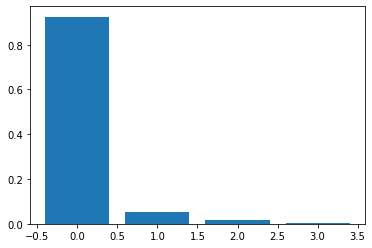

In [78]:
# Solve Here
# Sepearting out the features
#convert categorical data into numerical data

z = data.drop('class', axis = 1)

from sklearn.decomposition import PCA
pca1 = PCA()
pca1.fit(z)
reduced_data = pca1.transform(z)
print(reduced_data.shape)
plt.bar(np.arange(4),pca1.explained_variance_ratio_)


In [80]:
pca1 = PCA(n_components = 3)
pca1.fit(z)
reduced_data2 = pca1.transform(z)
reduced_data2.shape

(150, 3)

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

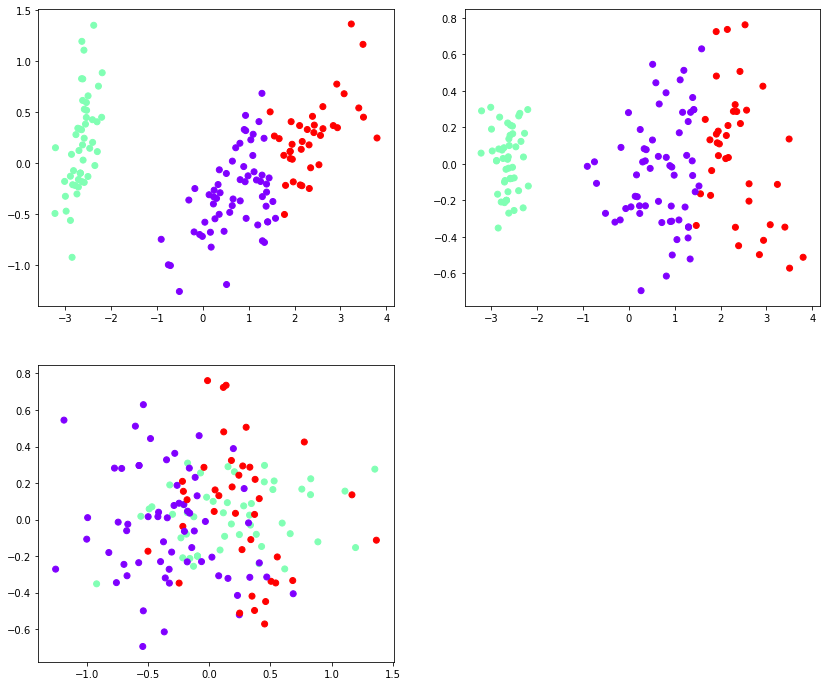

In [84]:
# Solve Here
from sklearn.cluster import KMeans
kmin = KMeans(n_clusters = 3)
kmin.fit(reduced_data2)

##Plot the 3 combinations
plt.figure(figsize = (14,12))
plt.subplot(221)
plt.scatter(reduced_data2[:,0],reduced_data2[:,1], c = kmin.labels_, cmap ='rainbow')
plt.subplot(222)
plt.scatter(reduced_data2[:,0],reduced_data2[:,2], c = kmin.labels_, cmap ='rainbow')
plt.subplot(223)
plt.scatter(reduced_data2[:,1],reduced_data2[:,2], c = kmin.labels_, cmap ='rainbow')
plt.show()

In [ ]:
### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [87]:
# Solve Here
from sklearn.model_selection import train_test_split
## Step o Split the dataset into training (80%) and test (20%) sets

x_train1, x_test1, y_train1, y_test1 = train_test_split(z,data['class'],test_size=0.20)


#
# Build the model then fit it with data

#Step1 : Start building the model

from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(x_train1, y_train1)

###

predictions = logisticReg.predict(x_test1)

###
## Use score method to get the accuracy of the model

print('training:', logisticReg.score(x_train1, y_train1)*100)
print('validation:', logisticReg.score(x_test1, y_test1)* 100)



training: 96.66666666666667
validation: 93.33333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[13  0  0]
 [ 0  6  2]
 [ 0  0  9]]


Text(0.5, 84.5, 'Predicted label')

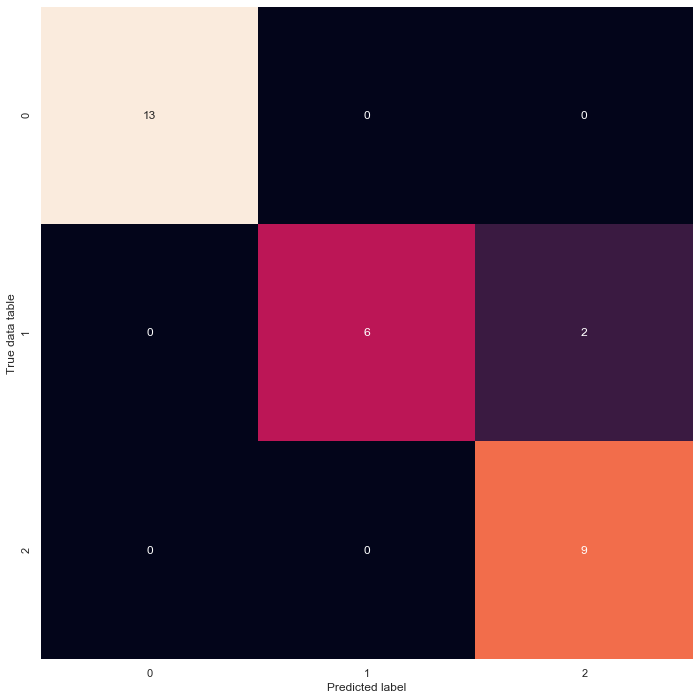

In [90]:
#### A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data
#for which the true values are known

from sklearn import metrics
confm = metrics.confusion_matrix(y_test1, predictions)
print(confm)

##########
import seaborn as sns; sns.set()
fig.hm = plt.subplots (figsize = (12,12))
sns.heatmap(confm, square = True, annot = True, fmt = 'd', cbar = False)

plt.ylabel('True data table')
plt.xlabel ('Predicted label')
